In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [4]:
DATADIR = "C:/Users/Spark/Desktop/data"


In [5]:
CATEGORIES = ["female", "male"]

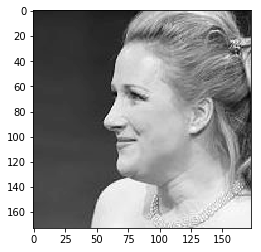

In [6]:
for category in CATEGORIES:  # do all pictures
    path = os.path.join(DATADIR,category)  # create path to female and male
    for img in os.listdir(path):  # iterate over each image per female and male
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #to see it is loading or not

In [7]:
print(img_array)

[[ 37  37  37 ...  29  28  28]
 [ 37  37  37 ...  29  33  34]
 [ 38  38  38 ...  27  37  38]
 ...
 [ 76  77  77 ... 242 242 242]
 [ 77  77  77 ... 242 242 242]
 [ 77  77  78 ... 242 242 242]]


In [8]:
IMG_SIZE = 48

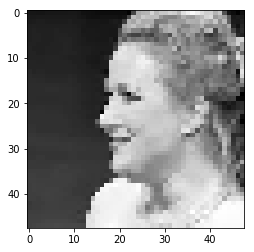

In [9]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do female and male

        path = os.path.join(DATADIR,category)  # create path to female and male
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=female 1=male

        for img in tqdm(os.listdir(path)):  # iterate over each image per female and male
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 9181/9181 [00:24<00:00, 379.31it/s]


18362


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
1
1
0
0
1


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[193]
   [150]
   [147]
   ...
   [169]
   [167]
   [167]]

  [[213]
   [150]
   [146]
   ...
   [167]
   [166]
   [166]]

  [[226]
   [152]
   [146]
   ...
   [161]
   [165]
   [165]]

  ...

  [[112]
   [110]
   [115]
   ...
   [125]
   [124]
   [118]]

  [[150]
   [172]
   [159]
   ...
   [162]
   [155]
   [147]]

  [[129]
   [126]
   [127]
   ...
   [181]
   [179]
   [180]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)